Initial Imports

In [2]:
import kinematics as kin
import transforms as tr
from visualization import VizScene
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
np.set_printoptions(precision=4, suppress=True)

Part 1

In [8]:
dh = np.array([[-np.pi/2,2.7,-.7,np.pi/2],
               [np.pi/2,0,0,-np.pi/2],
               [0,3.64,-.7,np.pi/2],
               [0,0,0,-np.pi/2],
               [0,3.74,-.1,np.pi/2],
               [0,0,0,-np.pi/2],
               [0,2.3,0,0]])

jt_types = ['r', 'r', 'r', 'r', 'r', 'r', 'r']

q_set_0 = [0, 0, 0, 0, 0, 0, 0]
q_set_1 = [-0.1135, -0.06481, 0.05024, 0.05561, 0.79077, -1.068, 2.979]
q_set_2 = [0.4836, -1.118, -0.3869, 2.2891, 1.8005, -1.5704, 3.0357]
q_set_3 = [0.4974, -1.1965, -0.8786, -0.0495, 3.05, -1.5455, 3.03575]
q_set_4 = [0.03106, 0.1020, -0.35742, 1.2049, 3.0576, -0.0360, 3.03613]

t_torso = np.array([[0.7071, 0.7071, 0, 0.06353],
                    [-0.7071, 0.7071, 0, -0.2597],
                    [0, 0, 1, 0.119],
                    [0, 0, 0, 1]])
arm = kin.SerialArm(dh, jt=jt_types, base=t_torso)

viz = VizScene()
viz.add_arm(arm, draw_frames=True)

viz.update(qs=[q_set_4])
viz.hold()

Part 2

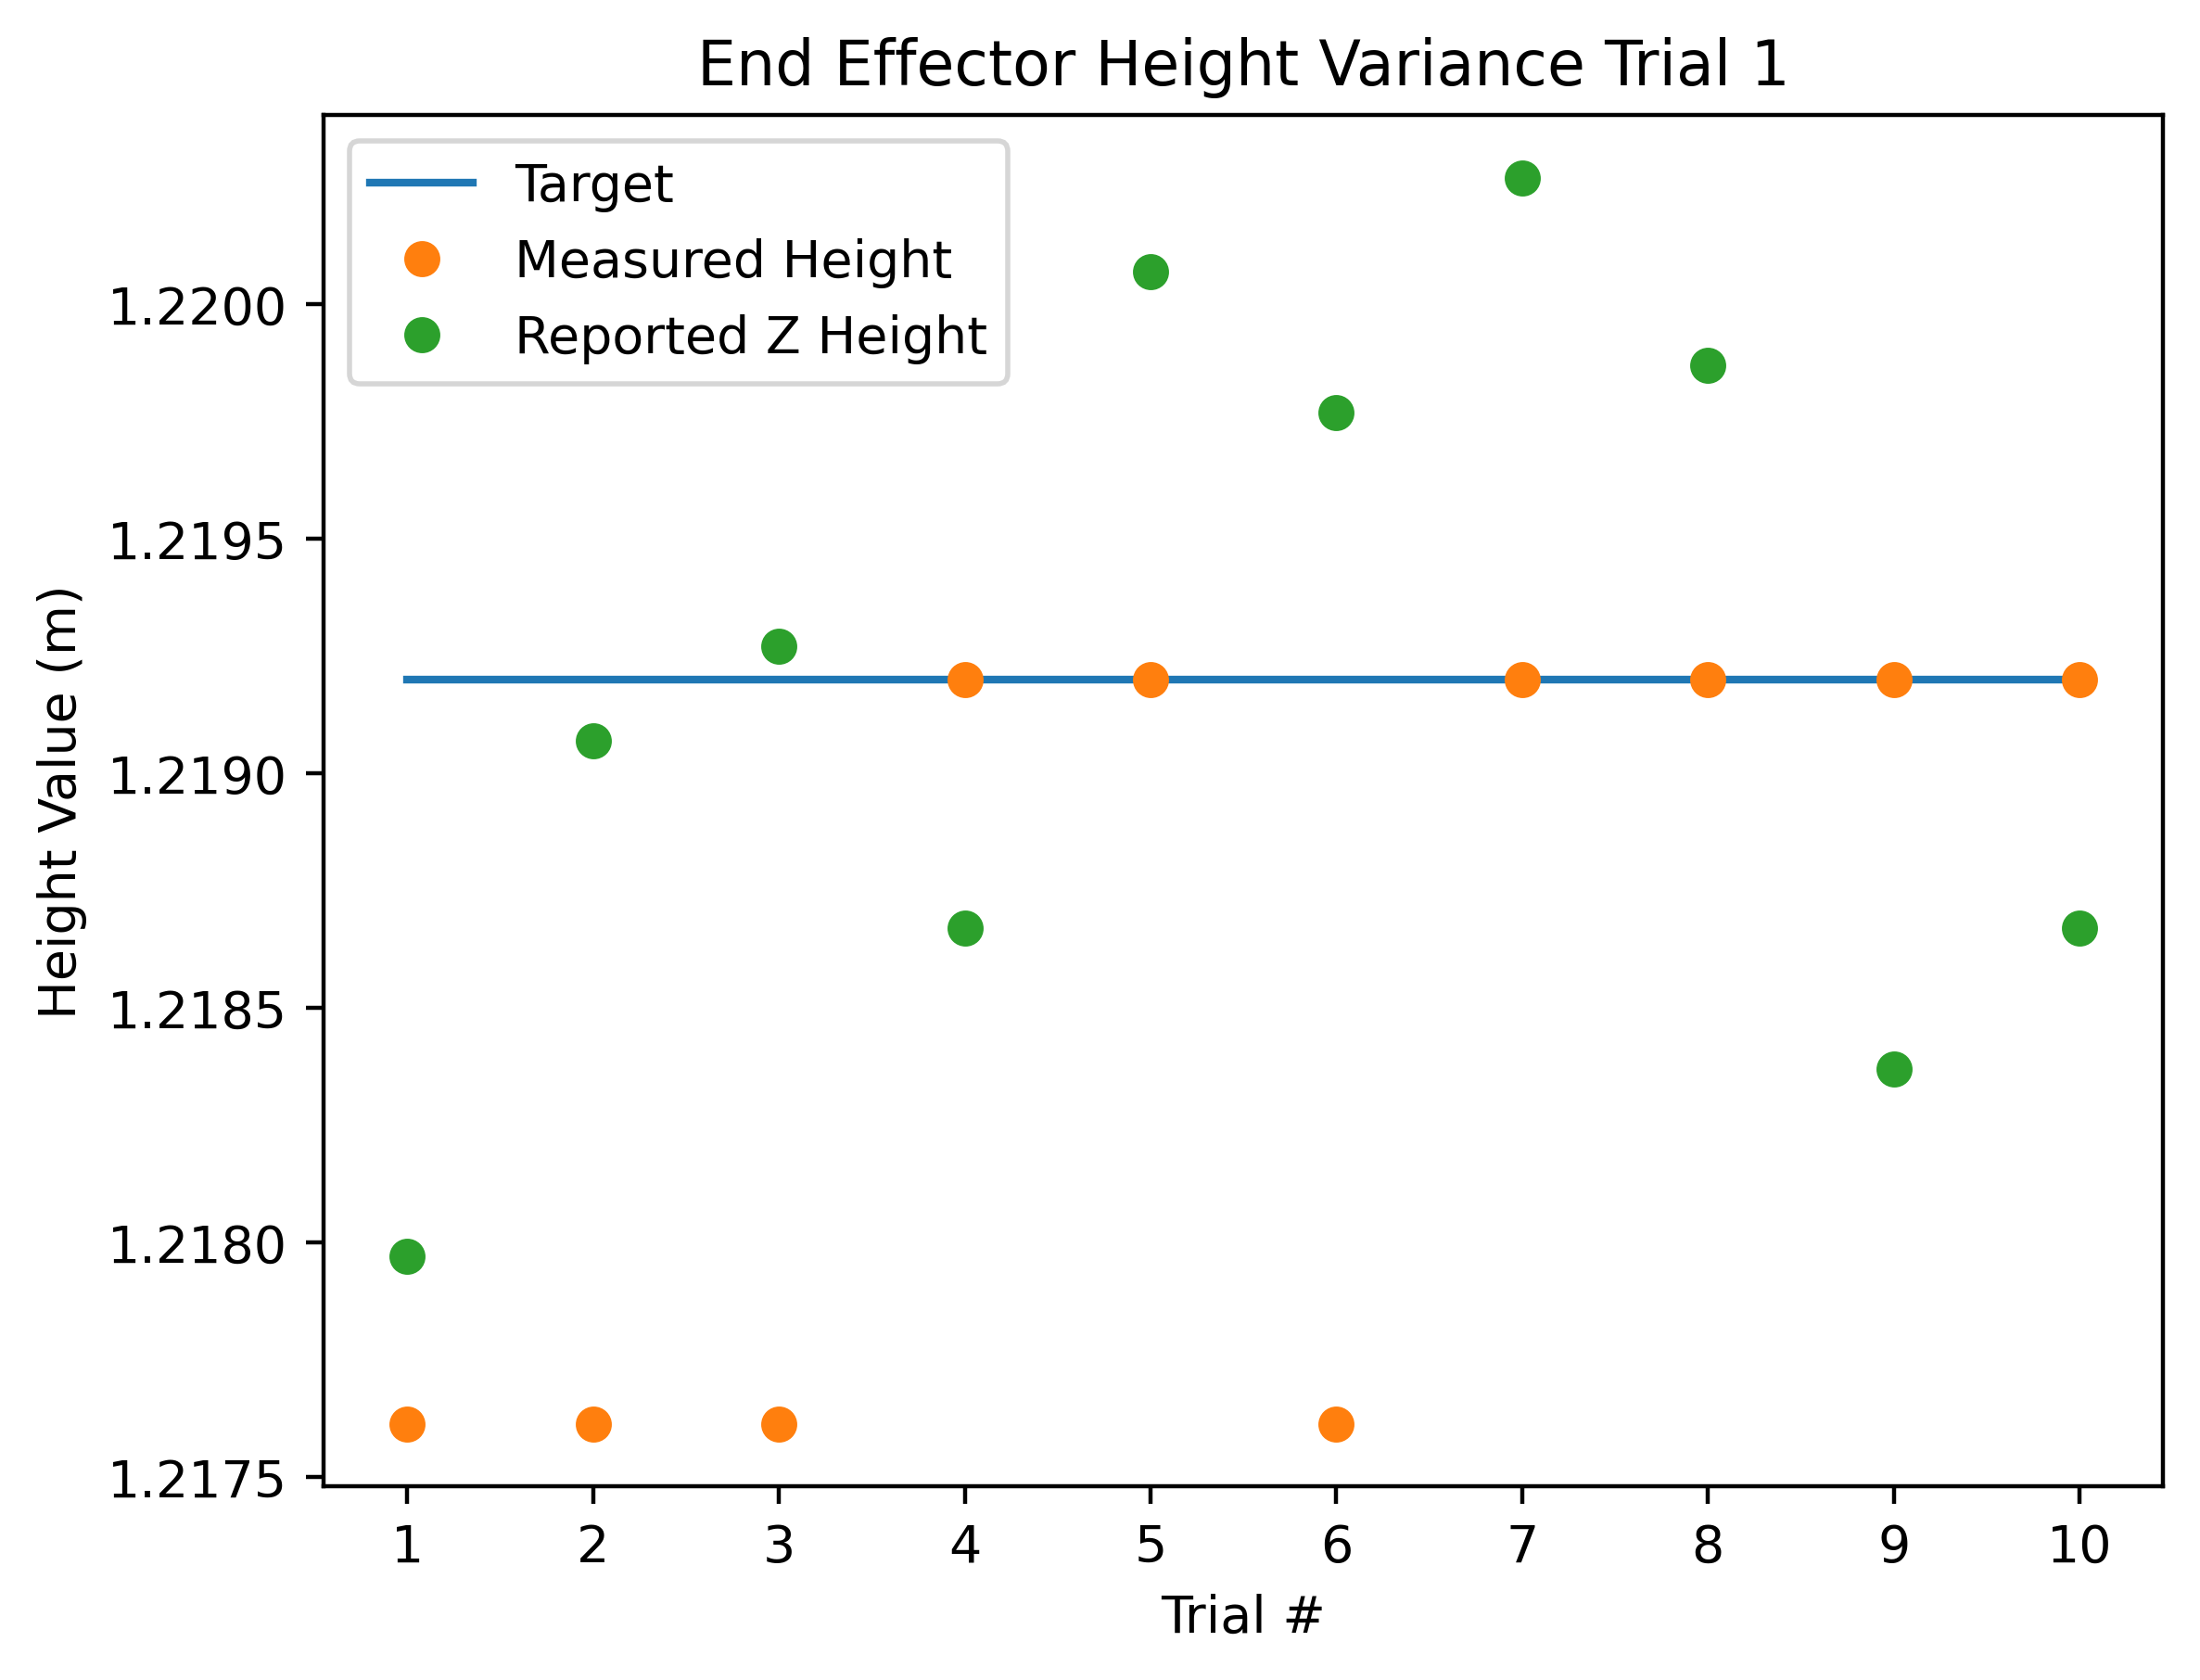

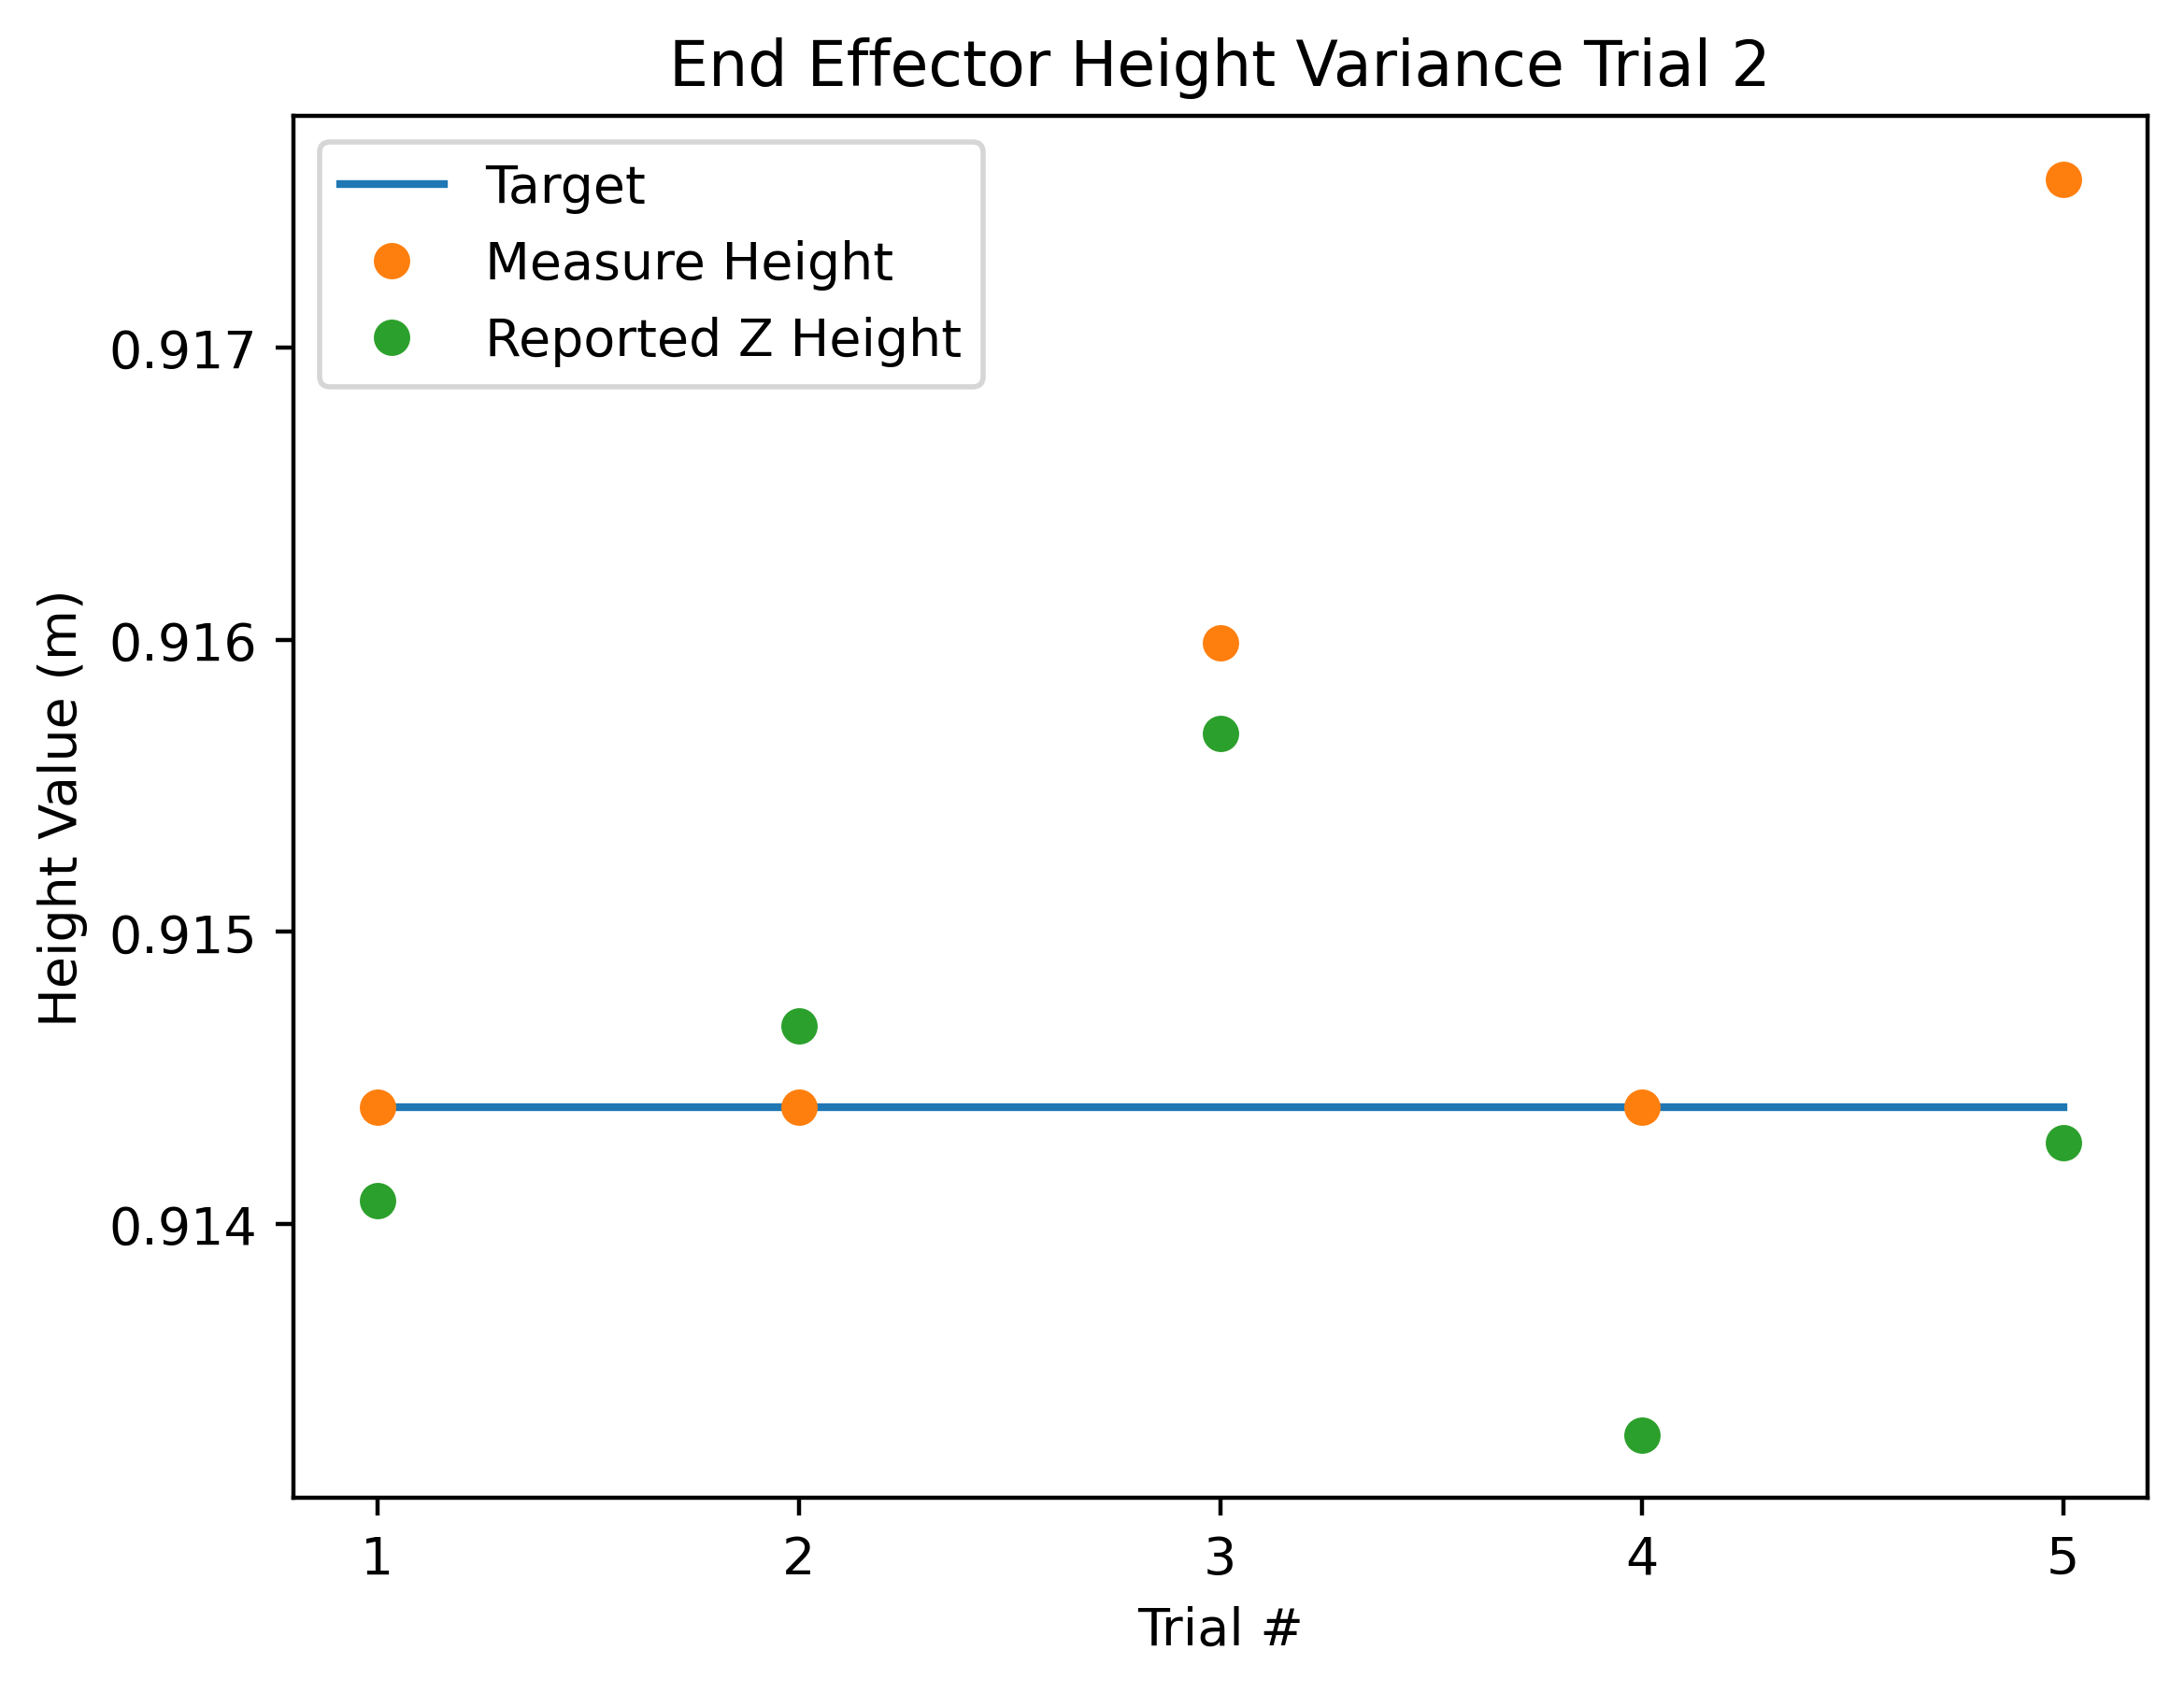

In [10]:
set_1_goal = np.ones(10) * 1.2192
set_1_actual = np.array([11.9375/12, 11.9375/12, 11.9375/12, 1, 1, 11.9375/12, 1, 1, 1, 1]) + 3
set_1_actual = set_1_actual * .3048
set_1_reported = np.array([.9042, .9053, .9055, .9049, .9063, .9060, .9065, .9061, .9046, .9049])
set_1_reported = set_1_reported + 1.2192 - np.mean(set_1_reported)

set_2_goal = np.ones(5) * .9144
set_2_actual = np.array([0, 0, 0.0625/12, 0, .125/12]) + 3
set_2_actual = set_2_actual * .3048
set_2_reported = np.array([.6017, .6023, .6033, .6009, .6019])
set_2_reported = set_2_reported + .9144 - np.mean(set_2_reported)

plt.plot(np.arange(1, 11, 1), set_1_goal, label='Target')
plt.plot(np.arange(1, 11, 1), set_1_actual, label='Measured Height', marker='o', linestyle=' ')
plt.plot(np.arange(1, 11, 1), set_1_reported, label='Reported Z Height', marker='o', linestyle=' ')
plt.legend()
plt.xlabel('Trial #')
plt.ylabel('Height Value (m)')
plt.title('End Effector Height Variance Trial 1')
plt.locator_params(axis='x', nbins=10)
plt.show()

plt.plot(np.arange(1, 6, 1), set_2_goal, label='Target')
plt.plot(np.arange(1, 6, 1), set_2_actual, label='Measure Height', marker='o', linestyle=' ')
plt.plot(np.arange(1, 6, 1), set_2_reported, label='Reported Z Height', marker='o', linestyle=' ')
plt.legend()
plt.xlabel('Trial #')
plt.ylabel('Height Value (m)')
plt.title('End Effector Height Variance Trial 2')
plt.locator_params(axis='x', nbins=5)
plt.show()

Part 3

In [60]:
full_lin = np.empty((0,4998))
full_ang = np.empty((0,4998))

for i in range(10):
    sheet = pd.read_excel("ME_537_Lab1_Part3.xlsx", sheet_name = f"Trial 0{i}")
    lin_vel_data = np.array([])
    ang_vel_data = np.array([])

    for i2 in range(5000-2):
        q = sheet.iloc[i2+1, 1:8].to_numpy()
        j = arm.jacob(q)
        q_dot = sheet.iloc[i2+1, 10:17].to_numpy().T
        vel = j @ q_dot
        lin_vel = vel[0:3]
        ang_vel = vel[3:6]
        lin_vel_norm = np.linalg.norm(lin_vel)
        # print(lin_vel_norm)
        ang_vel_norm = np.linalg.norm(ang_vel)
        # print(ang_vel_norm)
        lin_vel_data = np.append(lin_vel_data, lin_vel_norm)
        ang_vel_data = np.append(ang_vel_data, ang_vel_norm)
    full_lin = np.vstack((full_lin, [lin_vel_data]))
    full_ang = np.vstack((full_ang, [ang_vel_data]))
    print(f"Sheet {i} plotted")


Sheet 0 plotted
Sheet 1 plotted
Sheet 2 plotted
Sheet 3 plotted
Sheet 4 plotted
Sheet 5 plotted
Sheet 6 plotted
Sheet 7 plotted
Sheet 8 plotted
Sheet 9 plotted


In [ ]:
np.savetxt('lin_vels.csv', full_lin.T, delimiter=',')
np.savetxt('ang_vels.csv', full_ang.T, delimiter=',')

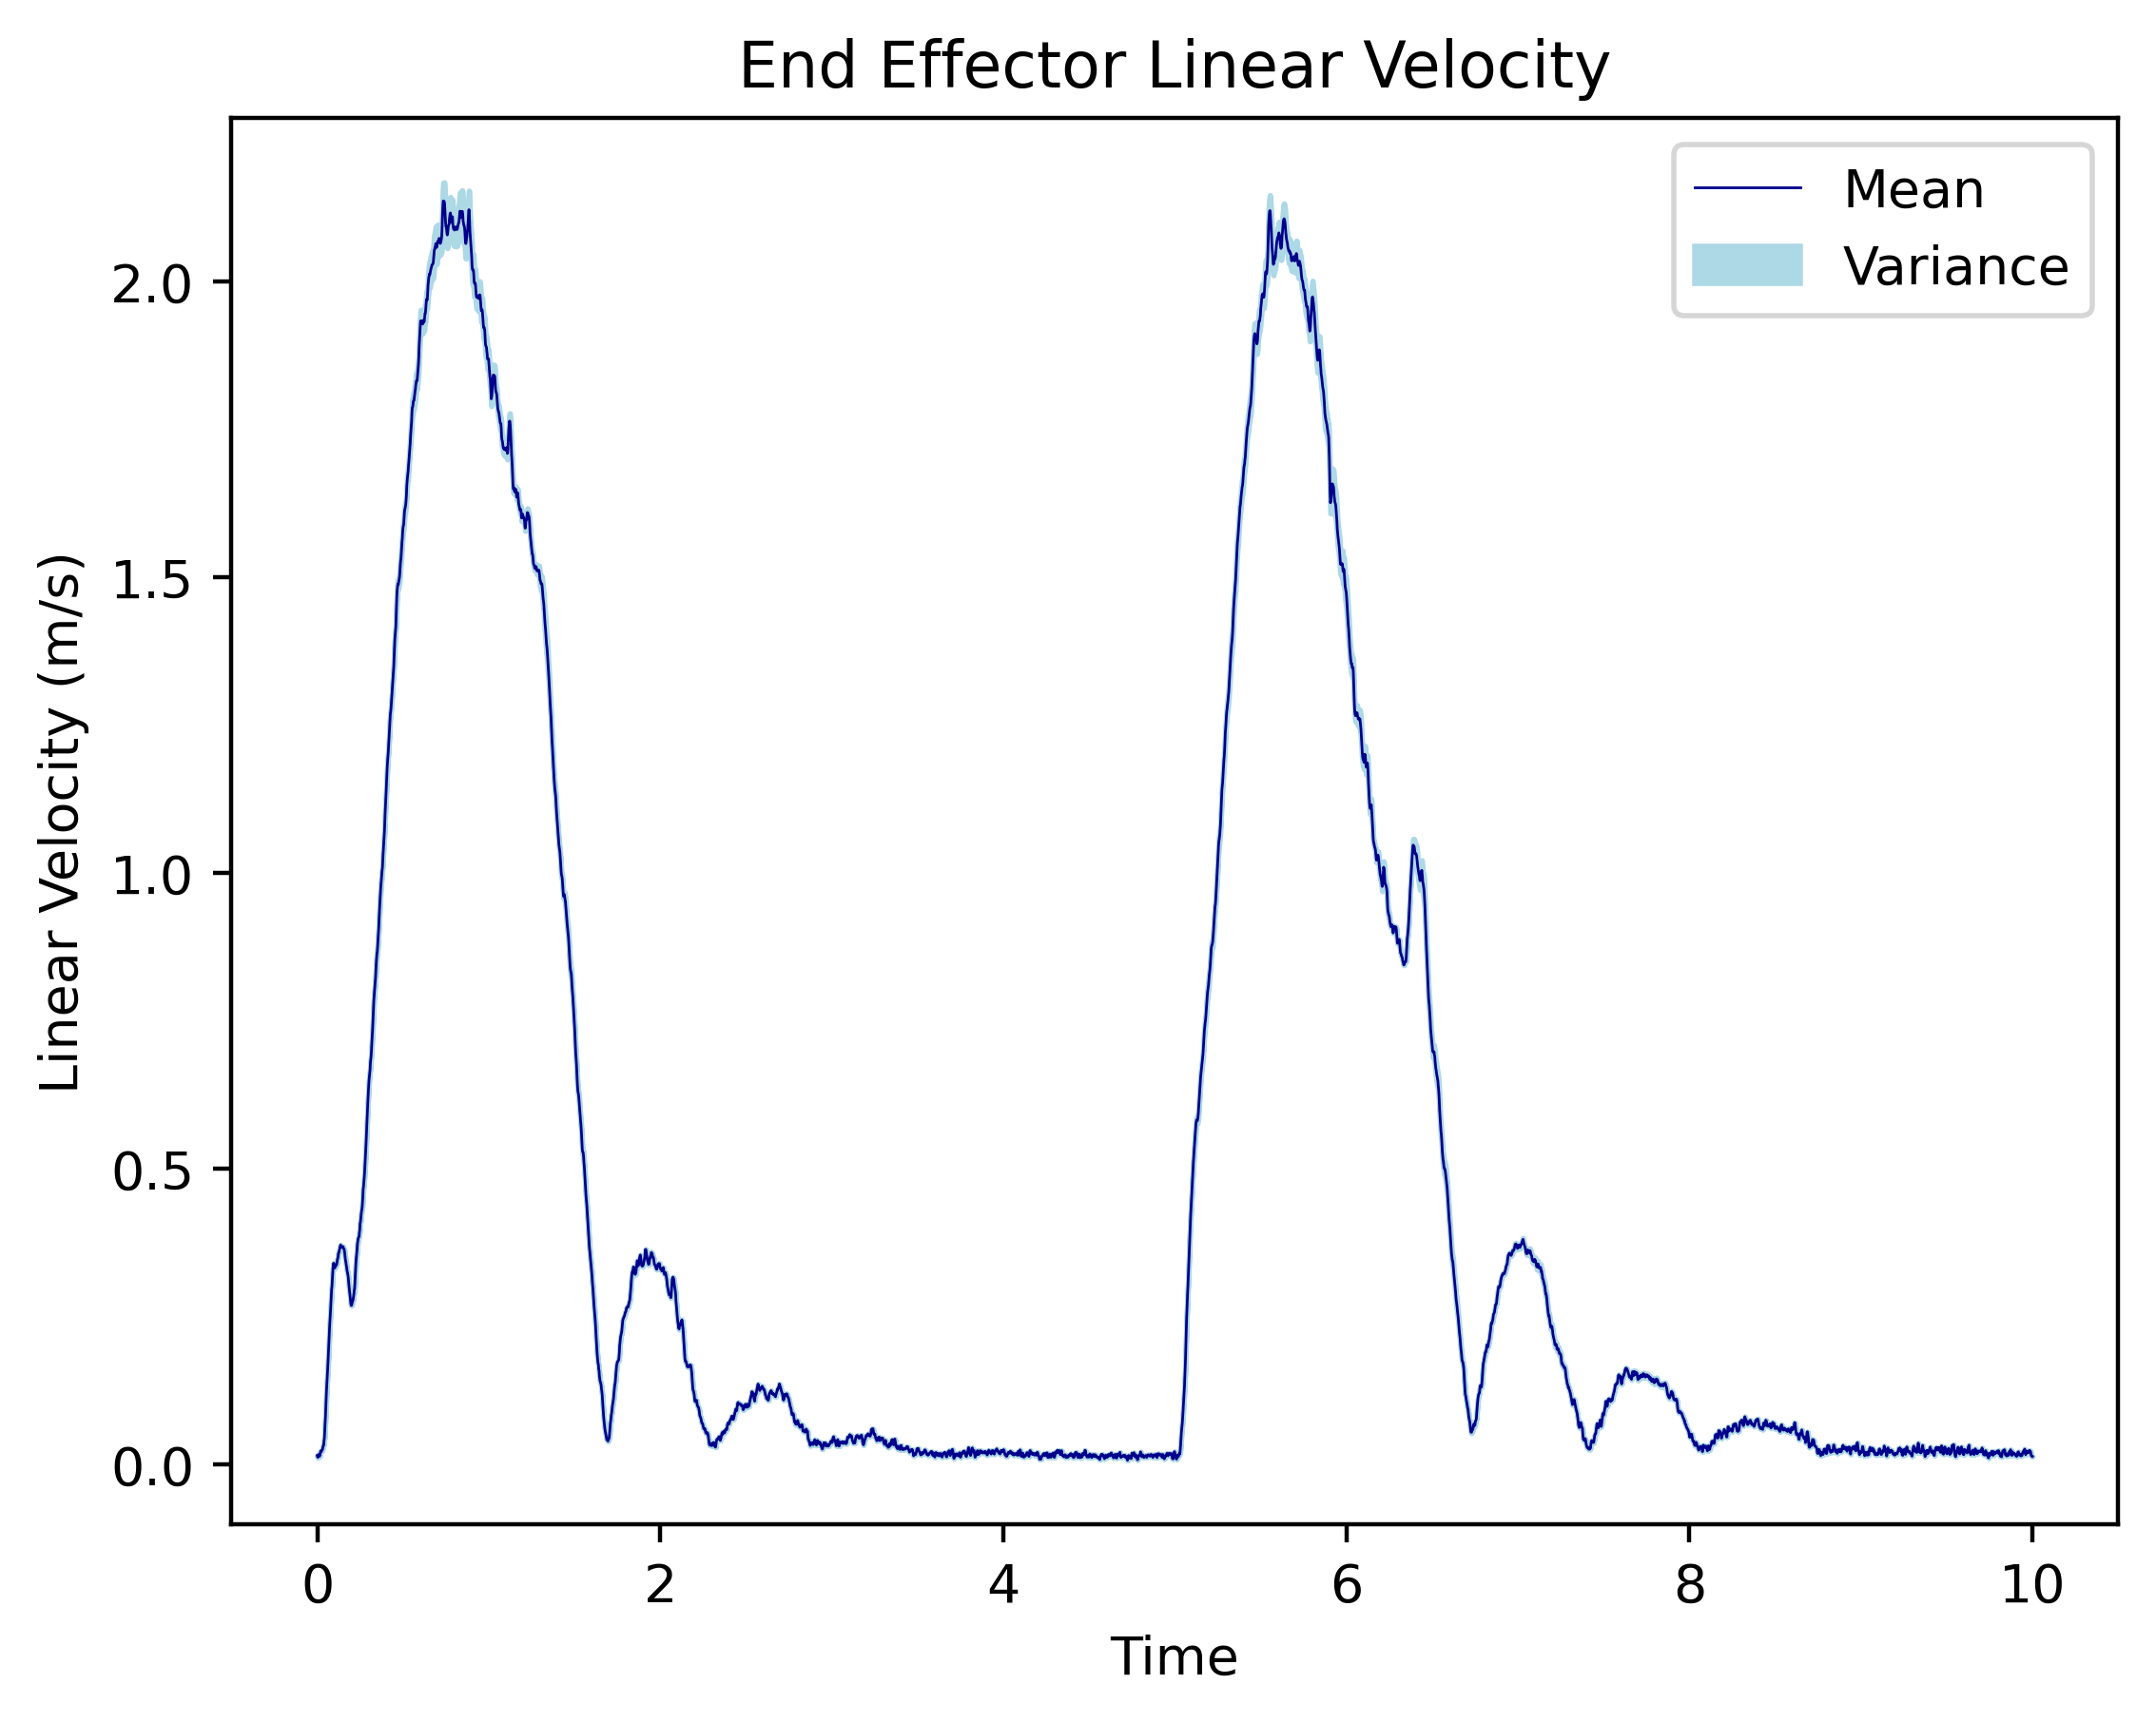

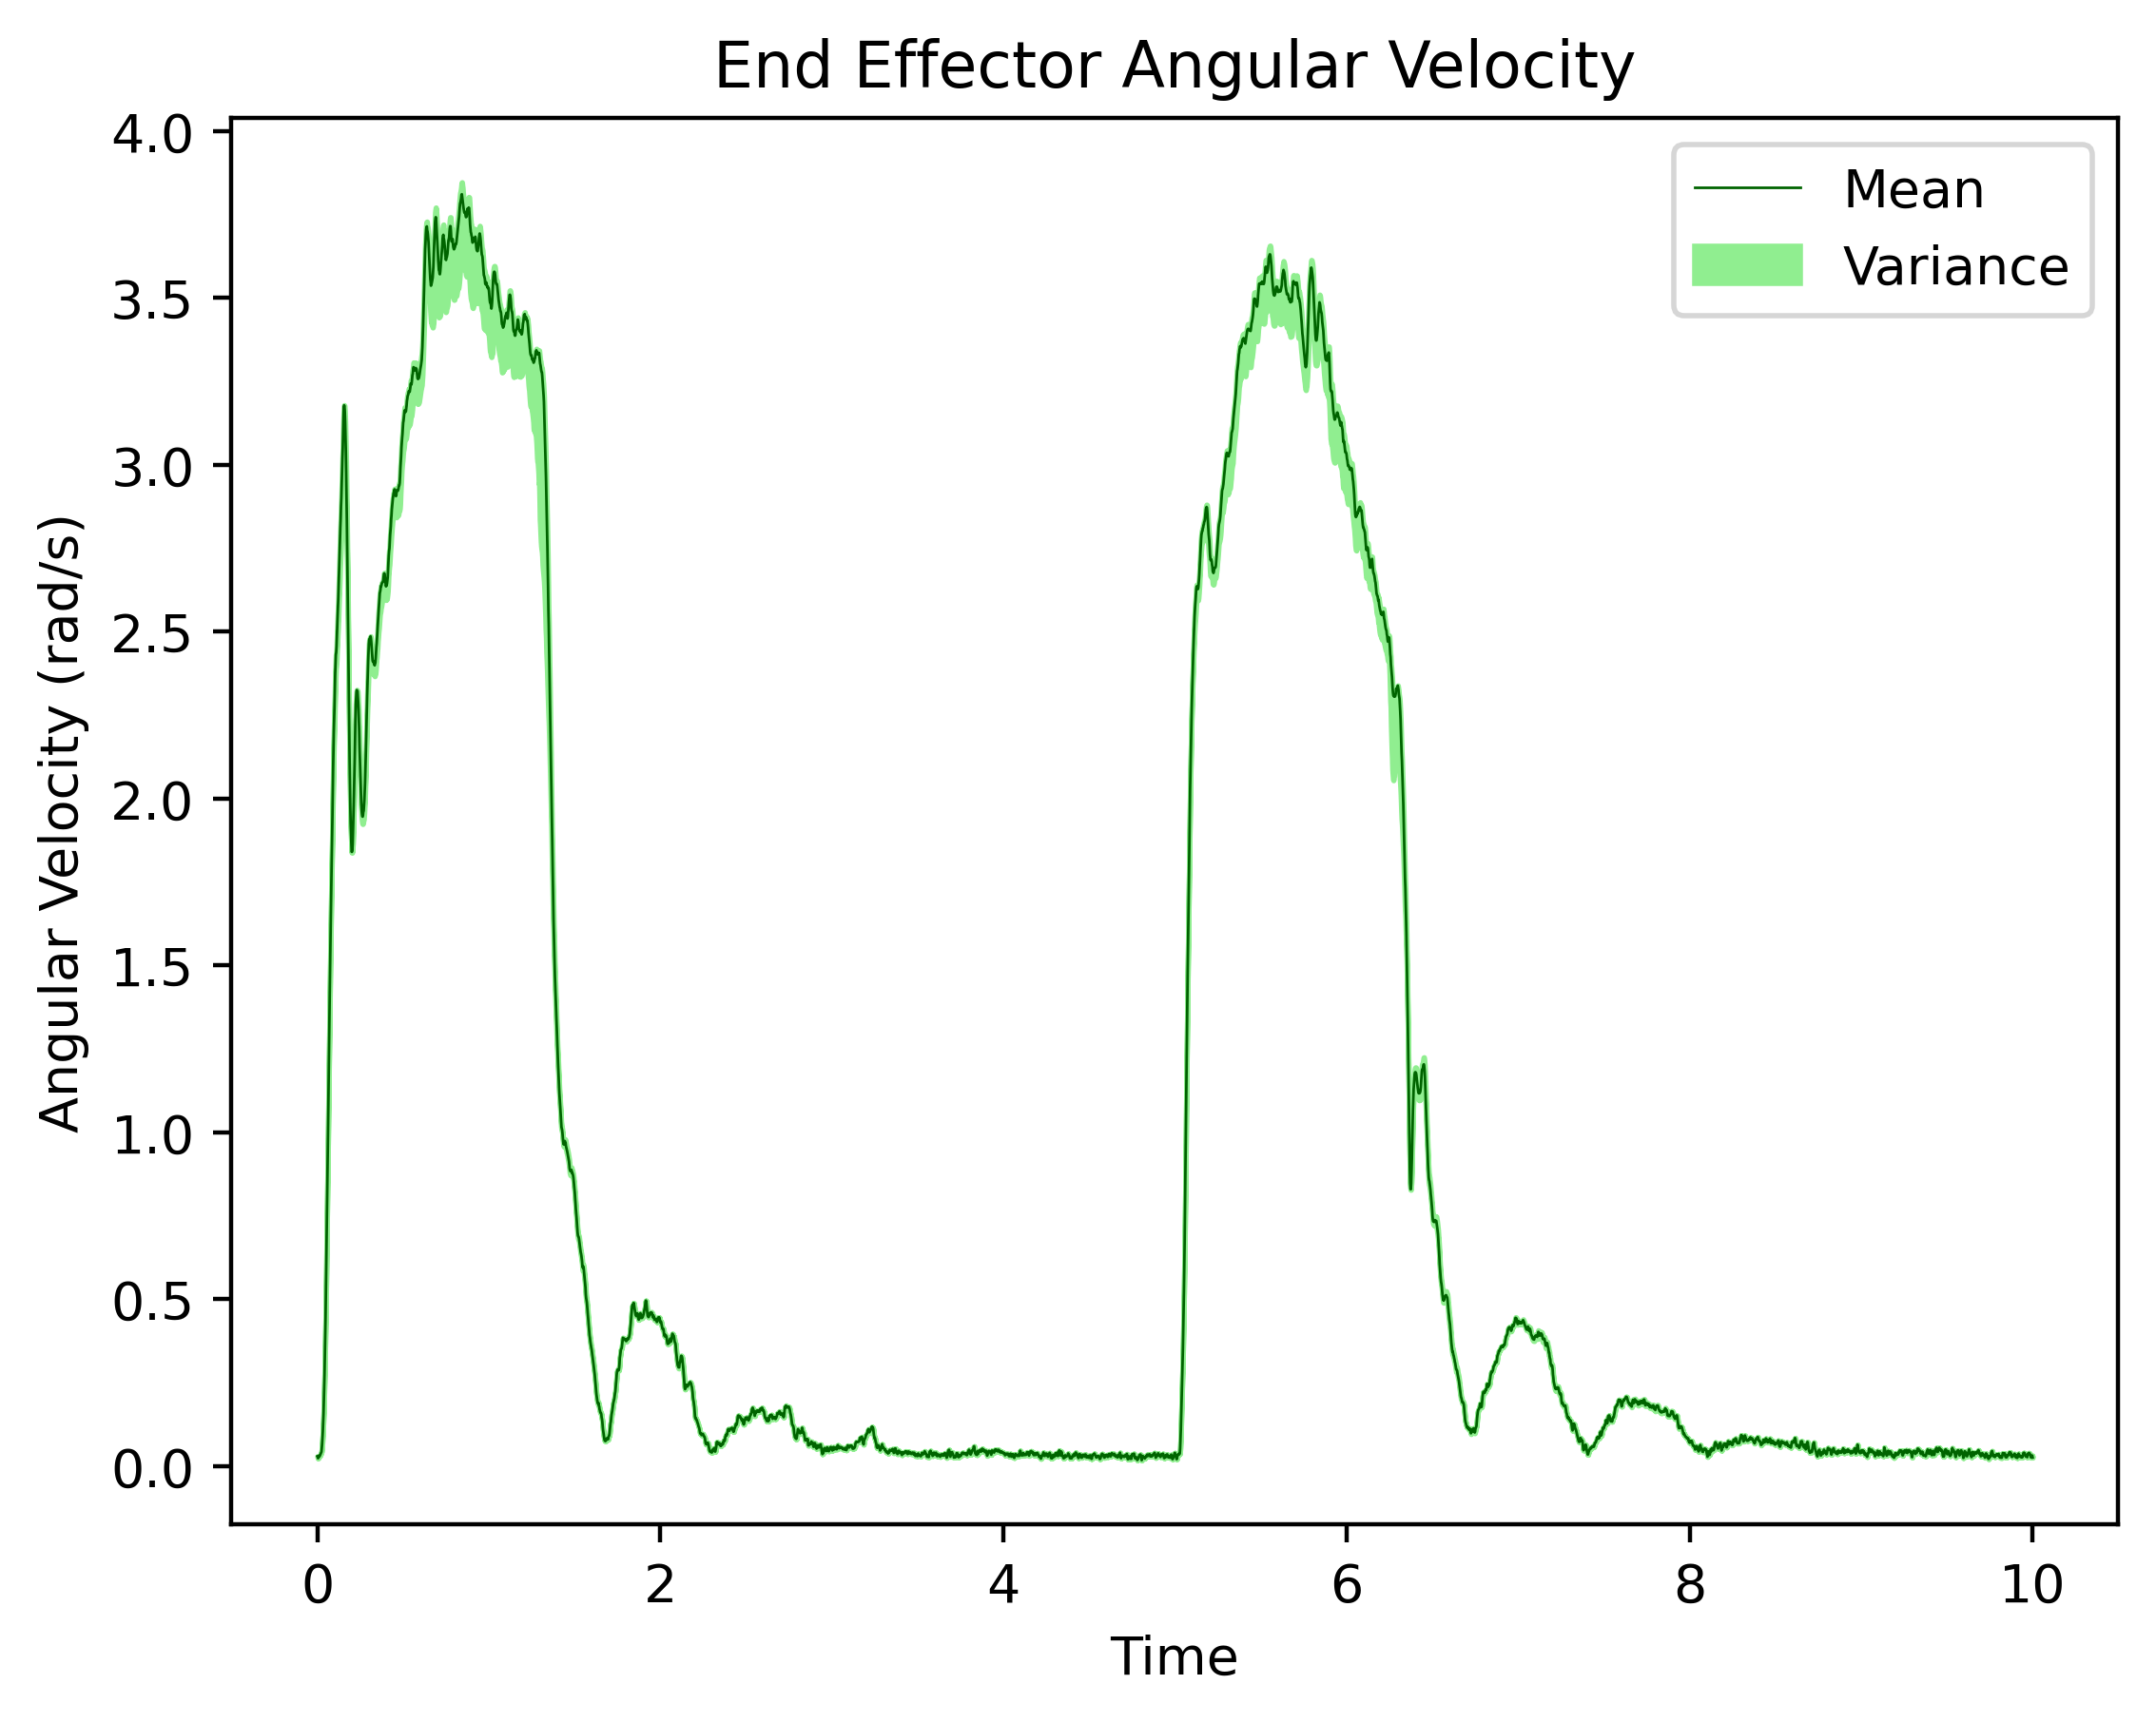

In [9]:
lin_df = pd.read_csv('lin_vels.csv')/10
ang_df = pd.read_csv('ang_vels.csv')

lin_mean = lin_df.mean(axis=1)
lin_std = lin_df.std(axis=1)

ang_mean = ang_df.mean(axis=1)
ang_std = ang_df.std(axis=1)

plt.rcParams['figure.dpi'] = 400

plt.plot(np.linspace(0, 10, 4997), lin_mean, color='darkblue', label='Mean', linewidth=.5)
plt.fill_between(np.linspace(0, 10, 4997), lin_mean - lin_std**2, lin_mean + lin_std**2, color='lightblue', label='Variance')
plt.title('End Effector Linear Velocity')
plt.xlabel('Time')
plt.ylabel('Linear Velocity (m/s)')
plt.legend()
plt.savefig("lin_velocities.png", dpi = 400)
plt.show()

plt.plot(np.linspace(0, 10, 4997), ang_mean, color='darkgreen', label='Mean', linewidth=.5)
plt.fill_between(np.linspace(0, 10, 4997), ang_mean - ang_std**2, ang_mean + lin_std**2, color='lightgreen', label='Variance')
plt.title('End Effector Angular Velocity')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.savefig("ang_velocities.png", dpi = 400)
plt.show()

